In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
import numpy as np
from pandas import Timestamp

from PIL import Image
import glob
from numpy.random import randint
import matplotlib as mpl
import os
import math

In [29]:
! pip install seaborn

In [30]:
import seaborn as sns

In [5]:
#set working directory as "directory"
directory = (r"E:\15_REPOS\08_MODFLOW_Chloride_Visuals")
os.chdir(directory)

In [6]:
df_raw = pd.read_csv(r"01.csv")
reducer = len(df_raw) -13
df = df_raw[:reducer]

In [7]:
#try and create subfolder for figures, plots
try:
    os.mkdir("Head_Vs_Time_Figures")
except FileExistsError:
    pass

In [8]:
try:  
    os.mkdir("ScatterPlots")
except FileExistsError:
    pass

In [9]:
try:
    os.mkdir("Head_Vs_Time_3x2")
except FileExistsError:
    pass

In [10]:
#set referential dates
refDate = dt(2003, 6, 1)
maxDate = dt(2021,6,1)

In [ ]:
df['Date'] = refDate + pd.TimedeltaIndex(df['Time'], unit='D')

In [19]:
df['Date'] = refDate + pd.TimedeltaIndex(df['Time'], pd.to_timedelta= 'D')

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2280602209.py, line 1)

In [20]:
#print(df.head(10))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      381 non-null    object        
 1   Time      381 non-null    float64       
 2   X         381 non-null    float64       
 3   Y         381 non-null    float64       
 4   Layer     381 non-null    float64       
 5   Observed  381 non-null    float64       
 6   Computed  381 non-null    float64       
 7   Weight    381 non-null    float64       
 8   Group     381 non-null    float64       
 9   Residual  381 non-null    float64       
 10  Date      381 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 32.9+ KB
None


In [21]:
#define series for graphing: observed, computed, layers, residual
#data to be multiplied by 0.0353147 to convert from mg/ft3 to mg/L
convert_var = 0.0353147

In [22]:
observed = df['Observed'] * convert_var
computed = df['Computed'] * convert_var
residual = df['Residual'] * convert_var

In [23]:
df['Layer'] = df['Layer'].astype(int)
print(df.Layer.value_counts())

Layer
12    156
11    101
9      44
8      33
10     15
7      14
6       8
5       7
4       2
2       1
Name: count, dtype: int64


C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_6380\3308147074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Layer'] = df['Layer'].astype(int)


In [24]:
#scatter plots1,2
def scatter1():
    sns.scatterplot(data=df, x="Observed", y="Residual",hue="Layer",  style = "Layer", palette='deep')
    plt.title("Observed vs. Residual")
    plt.legend(title="Layers", bbox_to_anchor=(1.0, 1.05))
    plt.tight_layout()
    plt.savefig("ScatterPlots/Observed_vs_Resid_Scatter.png", dpi=300)

In [25]:
def scatter2():
    sns.scatterplot(data=df, x="Observed", y="Computed",hue="Layer",  style = "Layer", palette='deep')
    plt.title("Computed vs. Residual")
    plt.legend(title="Layers", bbox_to_anchor=(1.0, 1.05))
    plt.tight_layout()
    plt.savefig("ScatterPlots/Observed_vs_Computed_Scatter.png", dpi=300)

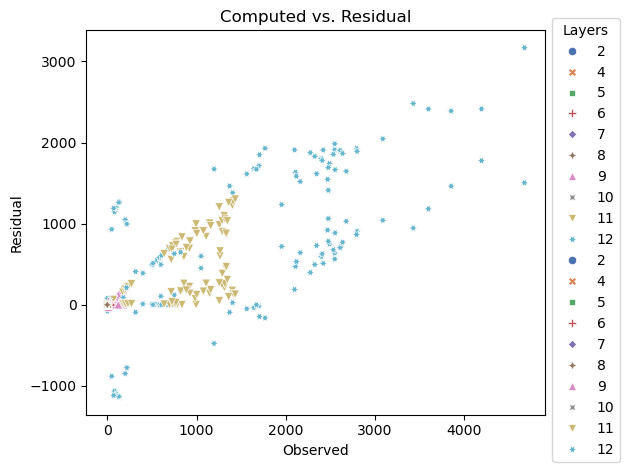

In [31]:
#call scatter1, scatter2
scatter1()
scatter2()

In [32]:
######
UniqueNames = df.Name.unique()
df_dict = {elem : pd.DataFrame for elem in UniqueNames}

In [33]:
for key in df_dict.keys():
    df_dict[key] = df[:][df.Name == key]

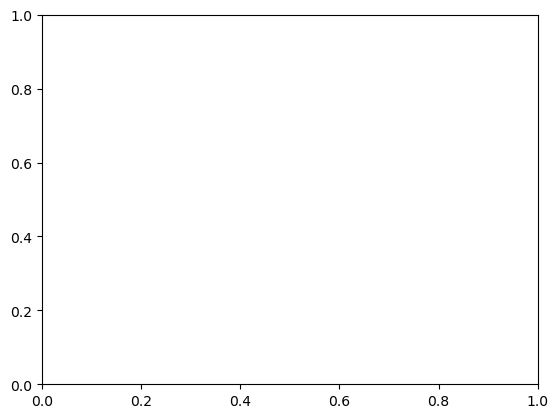

In [34]:
# iterate through dictionary and plot
fig, ax1 = plt.subplots()

KeyboardInterrupt: 

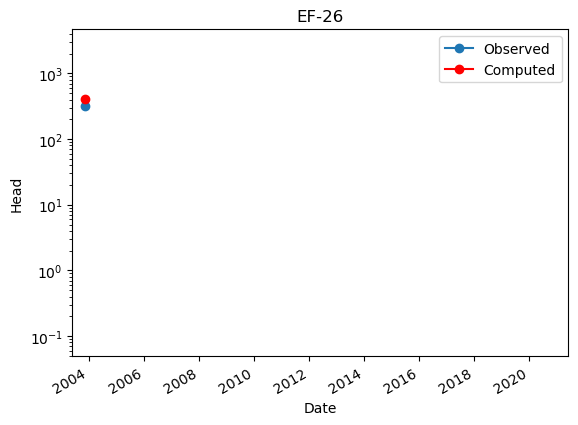

In [36]:
for i,val in df_dict.items():
    #plt.figure()
    ax1 = df_dict[i].plot(x='Date',y='Observed',marker = 'o') 
    #ax = "Time", y="Computed", marker = 'o', color="r")
    ax1 = df_dict[i].plot(x="Date", y="Computed",ax=ax1, marker = 'o', color="r")
    plt.xlim([refDate, maxDate])
    plt.ylim([df.Observed.min(), df.Observed.max()])
    ax1.set_yscale('log')  # set y-axis to log-scale
    ax1.set_ylabel("Head")
    #plt.legend()
    #plt.xlabel("Time")
    #plt.ylabel("Head")
    #plt.savefig("...")
    #scatter_directory = 
    ax1.set_title(i)
    plt.savefig(r'Head_Vs_Time_Figures/{}.png'.format(i), dpi=300)
    plt.close()

In [ ]:
FOLDER_PATH = "Head_Vs_Time_Figures"
GROUP_BY = 6

In [ ]:
def paste_images_in_PDF(page, groups): 
    width, height = int(8.27 * 450), int(11.7 * 375) # A4 at 300dpi
    pdf = Image.new('RGB', (width, height), 'white')
    for imgIndex, img in enumerate(groups):
        #There is a nicer way mathmatical formula way of doing this - but my brain is fried.
        if imgIndex == 0:
            pdf.paste(Image.open(img), box=(0, 0))
        if imgIndex == 1:
            pdf.paste(Image.open(img), box=(int(width/2. +0.5), 0))
        if imgIndex == 2:
            pdf.paste(Image.open(img), box=(0, int(height/3. + 0.5)))
        if imgIndex == 3:
            pdf.paste(Image.open(img), box=(int(width/2.+0.5), int(height/3.+0.5))) 
        if imgIndex == 4:
            pdf.paste(Image.open(img), box=(0, int(height/3.+0.5)*2))
        if imgIndex == 5:
            pdf.paste(Image.open(img), box=(int(width/2.+0.5), int(height/3.+0.5)*2))  
    pdf.save('Head_Vs_Time_3x2/page_{0}.pdf'.format(page+1))

In [ ]:
def group_images_generator(images):
    total_images = len(images)
    for i in range(0,math.ceil(total_images/GROUP_BY)):
        yield images[i*GROUP_BY:i*GROUP_BY+GROUP_BY]

In [ ]:
def main():
    images = glob.glob("{0}/*.png".format(FOLDER_PATH)) 
    for image in images:
        with open(image, 'rb') as file:
            img = Image.open(file)
    groups = group_images_generator(images)
    [paste_images_in_PDF(page, group) for page, group in enumerate(groups) ]

In [ ]:
#run above functions; return png and pdf files to subfolders
if __name__ == "__main__":
    main()